In [50]:
# step 1: uploading file
from google.colab import files
uploaded = files.upload()

Saving student_feedback.csv to student_feedback (2).csv


In [36]:
# step 2: Load and Preview the Dataset
import pandas as pd
df = pd.read_csv('student_feedback.csv', dtype={'Student ID': str})
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [37]:
# Step 3: Data Cleaning and Rating Analysis
df = df.drop(columns=['Unnamed: 0'])
df['Student ID'] = df['Student ID'].astype(str)
average_ratings = df.drop(columns=['Student ID']).mean().sort_values(ascending=False)
average_ratings

,0
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Provides support for students going above and beyond,5.662338
Structuring of the course,5.636364
Course recommendation based on relevance,5.598402
Solves doubts willingly,5.474525
Degree of difficulty of assignments,5.430569


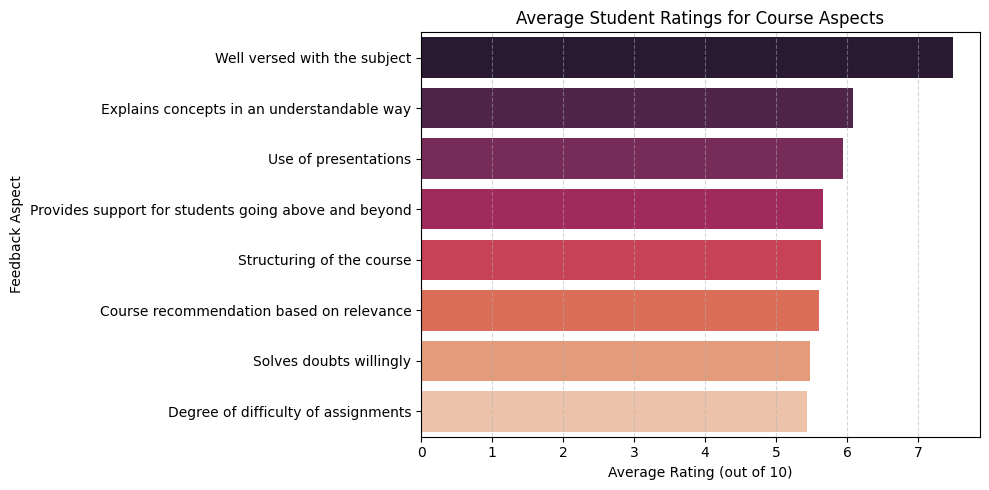

In [38]:
# Step 4: Visualizing Average Ratings for Course Aspects
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ratings_df = pd.DataFrame({
    'Feature': average_ratings.index,
    'Average Rating': average_ratings.values
})
plt.figure(figsize=(10, 5))
sns.barplot(
    data=ratings_df,
    x='Average Rating',
    y='Feature',
    hue='Feature',
    palette='rocket',
    dodge=False
)
plt.title("Average Student Ratings for Course Aspects")
plt.xlabel("Average Rating (out of 10)")
plt.ylabel("Feedback Aspect")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [40]:
# Renaming the long column name to just 'Recommendation' for easier use

df.rename(columns={'Course recommendation based on relevance': 'Recommendation'}, inplace=True)


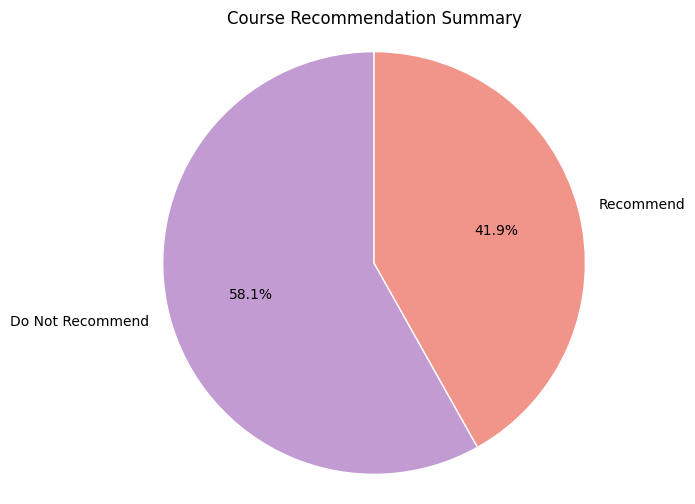

In [41]:
# Step 5: Course Recommendation Summary (Pie Chart)
df['Recommendation Category'] = df['Recommendation'].apply(lambda x: 'Recommend' if x >= 7 else 'Do Not Recommend')
recommend_counts = df['Recommendation Category'].value_counts()
colours = ['#c39bd3', '#f1948a']
plt.figure(figsize=(6, 6))
plt.pie(
    recommend_counts,
    labels=recommend_counts.index,
    colors=colours,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

# Step 5: Add title and show chart
plt.title('Course Recommendation Summary')
plt.axis('equal')
plt.show()


In [48]:
# Step 6: Adding Simulated Feedback Comments
import random
sample_comments = [
    "The course was very informative and engaging.",
    "The assignments were too lengthy and difficult.",
    "Concepts were explained clearly and concisely.",
    "The sessions felt a bit boring and repetitive.",
    "Excellent presentation and helpful resources.",
    "The course wasn’t relevant to my interests.",
    "Well-structured and easy to follow.",
    "Too many topics were rushed through.",
    "Good teaching but confusing assignments.",
    "Great interaction and doubt-solving support.",
    "Slides were helpful but lacked examples.",
    "Very useful for real-world application.",
    "Could be improved with more hands-on tasks.",
    "Enjoyed the pace and teaching style.",
    "Too much theoretical content, not engaging."
]

df['Feedback'] = [random.choice(sample_comments) for _ in range(len(df))]


In [43]:
print(df.columns.tolist())

 # Checking the colums to confirm that the 'Feedback' column has been added



['Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Recommendation', 'Recommendation Category', 'Feedback']


In [44]:
# Step 7:  Sentiment Analysis using NLP (TextBlob)
from textblob import TextBlob

df['Polarity'] = df['Feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral' ))


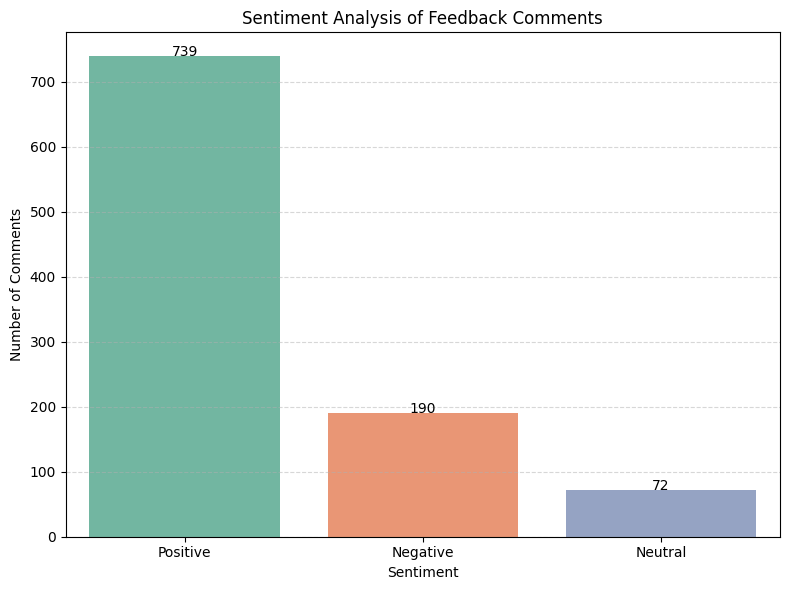

In [22]:
# Step 8: Visualizing Sentiment Distribution (Bar Chart)
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['Sentiment', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot( data= sentiment_df, x='Sentiment', y='Count', hue='Sentiment', palette='Set2', dodge= False, legend= False)
plt.title("Sentiment Analysis of Feedback Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

for i, row in sentiment_df.iterrows():
    plt.text(x=i, y=row['Count'] + 0.5, s=row['Count'], ha='center')

plt.show()







In [45]:
# Step 9: Installing Required Package: WordCloud
!pip install wordcloud

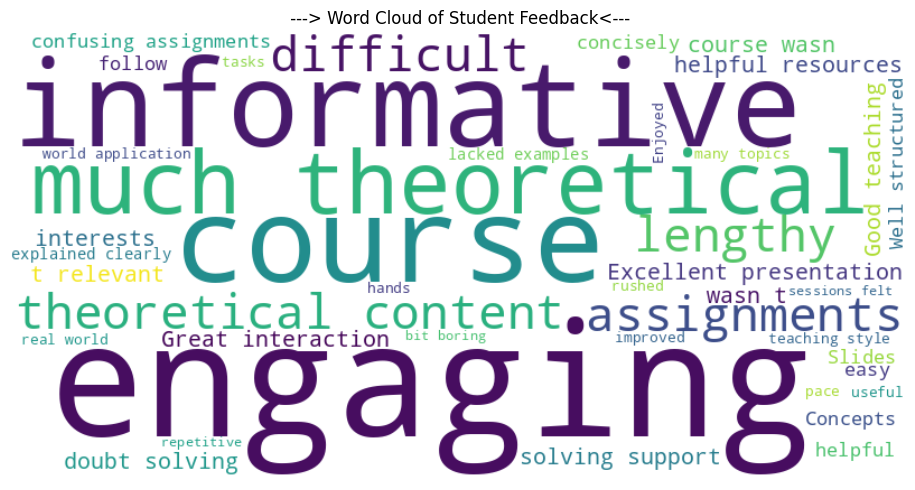

In [46]:
# Step 10: Displaying the Word Cloud of Student Feedback
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_feedback = ' '.join(df['Feedback'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_feedback)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(" ---> Word Cloud of Student Feedback<---")
plt.tight_layout()
plt.show()


In [49]:
df.head()

# Final Check: Previewing the Updated Dataset

,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Recommendation,Recommendation Category,Feedback,Polarity,Sentiment
0,340,5,2,7,6,9,2,1,8,Recommend,Well-structured and easy to follow.,-0.100000,Negative
1,253,6,5,8,6,2,1,2,9,Recommend,Great interaction and doubt-solving support.,0.433333,Positive
2,680,7,7,6,5,4,2,3,1,Do Not Recommend,Slides were helpful but lacked examples.,0.433333,Positive
3,806,9,6,7,1,5,9,4,6,Do Not Recommend,Enjoyed the pace and teaching style.,-0.625000,Negative
4,632,8,10,8,4,6,6,9,9,Recommend,Too many topics were rushed through.,0.800000,Positive
